In [1]:
No Changes

SyntaxError: invalid syntax (4121033867.py, line 1)

In [ ]:
[
  {
    "id": 1,
    "text": "These rules may be called the International Financial Services Centres Authority Rules, 2020. They shall come into force on the date of publication in the Official Gazette."
  },
  {
    "id": 2,
    "text": "Definitions include: (a) 'Act' means the International Financial Services Centres Authority Act of 2019; (b) 'Chairperson' means the Chairperson of the Authority appointed under section 5(1)(a) of the Act; (c) 'Member' refers to a member appointed under section 5(1)(d); (d) 'Selection Committee' means the committee constituted under rule 3."
  },
  {
    "id": 3,
    "text": "The Chairperson and Members shall be appointed by the Central Government on recommendation of a Selection Committee, consisting of senior government officials and experts in relevant fields. The Committee shall recommend a panel of two or three suitable candidates per post."
  },
  {
    "id": 4,
    "text": "No person shall be appointed as Chairperson or whole-time Member unless medically fit as certified by a competent authority designated by the Central Government."
  },
  {
    "id": 5,
    "text": "If a written complaint alleges misbehavior or incapacity of a Chairperson or whole-time Member, the Central Government shall preliminarily examine the complaint. If grounds are found, it will refer the matter to the Selection Committee to conduct an inquiry."
  },
  {
    "id": 6,
    "text": "The Selection Committee will complete its inquiry within the time specified and submit a report with its findings. The Committee shall follow natural justice principles and regulate its own procedure."
  },
  {
    "id": 7,
    "text": "The Chairperson and whole-time Members shall not have financial or other interests that prejudicially affect their functions. They must declare assets, liabilities, and interests before taking office."
  },
  {
    "id": 8,
    "text": "The Chairperson and whole-time Members are restricted from accepting government or financial institution employment in the International Financial Services Centres for two years post-tenure, without prior approval from the Central Government."
  },
  {
    "id": 9,
    "text": "The Chairperson may choose to receive pay equivalent to a Government Secretary or a consolidated salary of Rs. 4,50,000 per month. A whole-time Member may choose between pay of an Additional Secretary or Rs. 4,00,000 monthly."
  },
  {
    "id": 10,
    "text": "If the Chairperson or Member is retired and receiving pension or benefits, their salary will be reduced by the amount of those benefits."
  },
  {
    "id": 11,
    "text": "Chairperson and whole-time Members receiving Secretary or Additional Secretary pay are entitled to dearness allowance at Group 'A' officer rates."
  },
  {
    "id": 12,
    "text": "An entertainment allowance of up to Rs. 6,000 per annum shall be provided to the Chairperson and whole-time Members."
  },
  {
    "id": 13,
    "text": "Chairperson and Members are entitled to earned leave, half pay leave, casual leave, restricted holidays, and extraordinary leave as per specified conditions."
  },
  {
    "id": 14,
    "text": "Chairperson is the authority to sanction leave for Members. Central Government sanctions leave for the Chairperson and foreign travel for both."
  },
  {
    "id": 15,
    "text": "Chairperson and whole-time Members are governed by the Contributory Provident Fund (India) Rules, 1962 and the Contribution Pension System."
  },
  {
    "id": 16,
    "text": "Chairperson and Members are entitled to travel allowances on tour, transfer, and joining or exiting the office, as applicable to a Secretary or equivalent rank officer."
  },
  {
    "id": 17,
    "text": "They are entitled to Leave Travel Concession as per norms for a Secretary or Group 'A' officer, respectively."
  },
  {
    "id": 18,
    "text": "Rent-free unfurnished accommodation shall be provided as per rank entitlement, with water, electricity, and fuel charges borne by the occupant."
  },
  {
    "id": 19,
    "text": "If occupying private accommodation, they are entitled to a housing allowance and 10% of basic pay as compensation."
  },
  {
    "id": 20,
    "text": "Chairperson and Members shall be provided with a staff car for official use. Vehicles shall be hired, not purchased."
  },
  {
    "id": 21,
    "text": "Chairperson and whole-time Members are not entitled to any bonus or sitting fees for attending meetings of the Authority."
  },
  {
    "id": 22,
    "text": "They are entitled to encashment of up to 50% of earned leave credit at any time. Leave salary follows Central Civil Services rules."
  },
  {
    "id": 23,
    "text": "Medical treatment shall be provided under a health scheme specified by the Central Government."
  },
  {
    "id": 24,
    "text": "Conditions not covered in these rules shall be referred to the Central Government, whose decision shall be final."
  },
  {
    "id": 25,
    "text": "A part-time Member must not hold any conflicting interest and may be appointed for up to three years, with eligibility for reappointment."
  },
  {
    "id": 26,
    "text": "Part-time Members receive Rs. 6,000 per meeting attended and travel allowances equivalent to an Additional Secretary of the Government of India."
  },
  {
    "id": 27,
    "text": "The Central Government has the power to relax these rules for any class or category of persons."
  }
]


In [1]:
import os
import json
import math
import torch
import numpy as np
from tqdm.auto import tqdm
from dataclasses import dataclass
from contextlib import nullcontext
from datasets import DatasetDict, Dataset
import torch.nn as nn
import torch.nn.functional as F
import tiktoken

In [2]:
with open("/content/Data_01.json", "r", encoding="utf-8") as f:
    records = json.load(f)

In [3]:
split_idx = -5

In [4]:
train_data = Dataset.from_list(records[:split_idx])
val_data = Dataset.from_list(records[split_idx:])

In [5]:
ds = DatasetDict({
    "train": train_data,
    "validation": val_data
})

In [6]:
print(ds)
print("Train size:", len(ds["train"]))
print("Validation size:", len(ds["validation"]))

DatasetDict({
    train: Dataset({
        features: ['id', 'text'],
        num_rows: 22
    })
    validation: Dataset({
        features: ['id', 'text'],
        num_rows: 5
    })
})
Train size: 22
Validation size: 5


In [7]:
print(ds["train"][5])

{'id': 6, 'text': 'The Selection Committee will complete its inquiry within the time specified and submit a report with its findings. The Committee shall follow natural justice principles and regulate its own procedure.'}


In [8]:
print(ds["validation"][0])

{'id': 23, 'text': 'Medical treatment shall be provided under a health scheme specified by the Central Government.'}


In [9]:
enc = tiktoken.get_encoding("gpt2")

In [10]:
def process(example):
    ids = enc.encode_ordinary(example['text'])
    return {'ids': ids, 'len': len(ids)}

In [11]:
if not os.path.exists("train.bin"):
    tokenized = ds.map(
        process,
        remove_columns=['text'],
        desc="tokenizing the splits",
        num_proc=2,
        )
    # concatenate all the id in each dataset into one large file we can use for training
    for split, dset in tokenized.items():
        arr_len = np.sum(dset['len'], dtype=np.uint64)
        filename = f'{split}.bin'
        dtype = np.uint16 # (can do since enc.max_token_value == 50256 is < 2**16)
        arr = np.memmap(filename, dtype=dtype, mode='w+', shape=(arr_len,))
        total_batches = len(dset)

        idx = 0
        for batch_idx in tqdm(range(total_batches), desc=f'writing {filename}'):
          batch = dset.shard(num_shards=total_batches, index=batch_idx, contiguous=True)
          ids_list = batch['ids']
          flat_ids = [token_id for ids in ids_list for token_id in ids]
          arr_batch = np.array(flat_ids, dtype=np.uint16)

          arr[idx : idx + len(arr_batch)] = arr_batch
          idx += len(arr_batch)
        arr.flush()

tokenizing the splits (num_proc=2):   0%|          | 0/22 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


tokenizing the splits (num_proc=2):   0%|          | 0/5 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by promote_options='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/usr/local/lib/python3.11/dist-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)


writing train.bin:   0%|          | 0/22 [00:00<?, ?it/s]

writing validation.bin:   0%|          | 0/5 [00:00<?, ?it/s]

In [12]:
# Some functions from https://github.com/karpathy/nanoGPT/blob/master/train.py with slight modifications
def get_batch(split):
    # We recreate np.memmap every batch to avoid a memory leak, as per
    # https://stackoverflow.com/questions/45132940/numpy-memmap-memory-usage-want-to-iterate-once/61472122#61472122
    if split == 'train':
        data = np.memmap('train.bin', dtype=np.uint16, mode='r')
    else:
        data = np.memmap('validation.bin', dtype=np.uint16, mode='r')
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
    if device_type == 'cuda':
        # pin arrays x,y, which allows us to move them to GPU asynchronously (non_blocking=True)
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y

In [13]:
class LayerNorm(nn.Module):
    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None
    def forward(self, x):
        return F.layer_norm(x, self.weight.shape, self.weight, self.bias, 1e-5)

In [14]:
class CausalSelfAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.flash = hasattr(F, 'scaled_dot_product_attention')
        if not self.flash:
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                       .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size()
        q, k, v = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2)

        if self.flash:
            y = F.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.attn_dropout.p if self.training else 0.0, is_causal=True)
        else:
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:, :, :T, :T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v

        y = y.transpose(1, 2).contiguous().view(B, T, C)
        y = self.resid_dropout(self.c_proj(y))
        return y

In [15]:
class MLP(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.c_fc = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu = nn.GELU()
        self.c_proj = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)
    def forward(self, x):
        return self.dropout(self.c_proj(self.gelu(self.c_fc(x))))

In [16]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln1 = LayerNorm(config.n_embd, config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln2 = LayerNorm(config.n_embd, config.bias)
        self.mlp = MLP(config)
    def forward(self, x):
        x = x + self.attn(self.ln1(x))
        x = x + self.mlp(self.ln2(x))
        return x

In [17]:
@dataclass
class GPTConfig:
    block_size: int
    vocab_size: int
    n_layer: int
    n_head: int
    n_embd: int
    dropout: float = 0.0
    bias: bool = True

In [18]:
class GPT(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.transformer = nn.ModuleDict(dict(
            wte=nn.Embedding(config.vocab_size, config.n_embd),
            wpe=nn.Embedding(config.block_size, config.n_embd),
            drop=nn.Dropout(config.dropout),
            h=nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f=LayerNorm(config.n_embd, config.bias),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        self.transformer.wte.weight = self.lm_head.weight  # weight tying

        self.apply(self._init_weights)
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                nn.init.normal_(p, mean=0.0, std=0.02 / math.sqrt(2 * config.n_layer))

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size
        pos = torch.arange(0, t, dtype=torch.long, device=device)

        tok_emb = self.transformer.wte(idx)
        pos_emb = self.transformer.wpe(pos)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)
            return logits, loss
        else:
            logits = self.lm_head(x[:, [-1], :])
            return logits, None

    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):
        """
        Generate tokens given a conditioning sequence.
        idx: Tensor of shape (B, T)
        """
        for _ in range(max_new_tokens):
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            logits, _ = self(idx_cond)
            logits = logits[:, -1, :] / temperature
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

In [19]:
config = GPTConfig(
    vocab_size=50257,     # use the tokenizer's vocab size
    block_size=128,       # or whatever context size you're training with
    n_layer=4,
    n_head=4,
    n_embd=256,
    dropout=0.1,
    bias=True
)

model = GPT(config)

In [20]:
def estimate_loss(model):
    out = {}
    model.eval()
    with torch.inference_mode():
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(split)
                with ctx:
                    logits, loss = model(X, Y)
                losses[k] = loss.item()
            out[split] = losses.mean()
    model.train()
    return out

In [21]:
# Training Config
import torch
from contextlib import nullcontext


learning_rate = 1e-4 #more stable training, earlier 1e-4
max_iters = 20000 #increase from 25000
warmup_steps = 1000 #smoother initial train, earlier 100
min_lr = 5e-4 #lower rate, earlier 5e-4
eval_iters = 500 # increased from 100
batch_size = 32 # changed from 16, better gradient estimate
## Impr but not work for this project block_size = 128 #changed from 64, capture longer range dependencies
train_tokens = len(np.memmap('train.bin', dtype=np.uint16))
val_tokens = len(np.memmap('validation.bin', dtype=np.uint16))
min_tokens = min(train_tokens, val_tokens)
block_size = min(128, min_tokens - 1)
gradient_accumulation_steps = 32 # reduced from 50

device =  "cuda" if torch.cuda.is_available() else "cpu"
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
# note: float16 data type will automatically use a GradScaler

# How to use autocast https://wandb.ai/wandb_fc/tips/reports/How-To-Use-Autocast-in-PyTorch--VmlldzoyMTk4NTky
#dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]

ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)

torch.set_default_device(device)
torch.manual_seed(42)

In [22]:
from torch.optim.lr_scheduler import LinearLR,SequentialLR, CosineAnnealingLR

##PUT IN WEIGHT DECAY, CHANGED BETA2 to 0.95
optimizer =  torch.optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.95), weight_decay=0.1, eps=1e-9) #weight decay for regularization

scheduler_warmup = LinearLR(optimizer, total_iters = warmup_steps) #Implement linear warmup
scheduler_decay = CosineAnnealingLR(optimizer,T_max = max_iters - warmup_steps, eta_min = min_lr) #Implement lr decay
scheduler = SequentialLR(optimizer, schedulers=[scheduler_warmup, scheduler_decay], milestones=[warmup_steps]) #Switching from warmup to decay

# https://stackoverflow.com/questions/72534859/is-gradscaler-necessary-with-mixed-precision-training-with-pytorch
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))

/tmp/ipython-input-22-2132813893.py:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))


In [23]:
best_val_loss = float('inf')
best_model_params_path = "best_model_params.pt"
train_loss_list, validation_loss_list = [], []

# Ensure model is on the correct device
model = model.to(device)

# In your training loop
for epoch in tqdm(range(max_iters)):
    if epoch % eval_iters == 0 and epoch != 0:
        # Ensure estimate_loss uses the correct device
        losses = estimate_loss(model)
        print(f"Epoch {epoch}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        print(f"The current learning rate: {optimizer.param_groups[0]['lr']:.5f}")
        train_loss_list += [losses['train']]
        validation_loss_list += [losses['val']]

        if losses['val'] < best_val_loss:
            best_val_loss = losses['val']
            torch.save(model.state_dict(), best_model_params_path)

    # Ensure X and y are on the correct device
    X, y = get_batch("train")
    X, y = X.to(device), y.to(device)

    with ctx:
        logits, loss = model(X, y)
        loss = loss / gradient_accumulation_steps
        scaler.scale(loss).backward()

    if ((epoch + 1) % gradient_accumulation_steps == 0) or (epoch + 1 == max_iters):
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad(set_to_none=True)
    scheduler.step()

  0%|          | 0/20000 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Epoch 500: train loss 9.5788, val loss 10.1519
The current learning rate: 0.00007


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 1000: train loss 8.3116, val loss 9.5275
The current learning rate: 0.00010
Epoch 1500: train loss 7.3765, val loss 9.1723
The current learning rate: 0.00010
Epoch 2000: train loss 6.5443, val loss 8.7810
The current learning rate: 0.00010
Epoch 2500: train loss 5.7557, val loss 8.4017
The current learning rate: 0.00011
Epoch 3000: train loss 5.0029, val loss 7.9644
The current learning rate: 0.00011
Epoch 3500: train loss 4.2000, val loss 7.4296
The current learning rate: 0.00012
Epoch 4000: train loss 3.4132, val loss 7.0179
The current learning rate: 0.00012
Epoch 4500: train loss 2.7088, val loss 6.7485
The current learning rate: 0.00013
Epoch 5000: train loss 2.0105, val loss 6.5804
The current learning rate: 0.00014
Epoch 5500: train loss 1.4283, val loss 6.4826
The current learning rate: 0.00015
Epoch 6000: train loss 0.9138, val loss 6.4513
The current learning rate: 0.00016
Epoch 6500: train loss 0.5296, val loss 6.5277
The current learning rate: 0.00018
Epoch 7000: trai

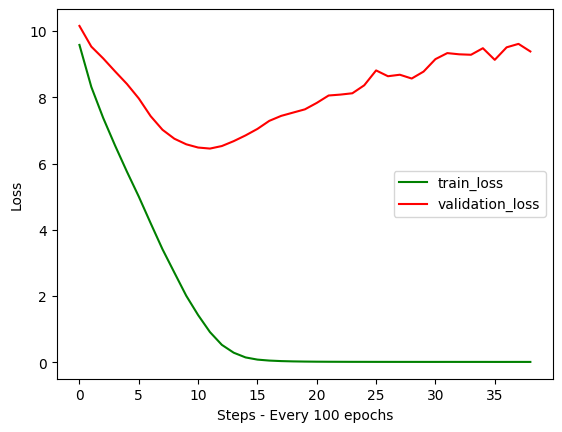

In [24]:
import matplotlib.pyplot as plt
train_loss_list_converted = [i.cpu().detach() for i in train_loss_list]
validation_loss_list_converted = [i.cpu().detach() for i in validation_loss_list]

plt.plot(train_loss_list_converted, 'g', label='train_loss')
plt.plot(validation_loss_list_converted, 'r', label='validation_loss')
plt.xlabel("Steps - Every 100 epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [25]:
#Load the model
model = GPT(config)  # re-create the model with same config
device =  "cuda" if torch.cuda.is_available() else "cpu"
best_model_params_path = "best_model_params.pt"
model.load_state_dict(torch.load(best_model_params_path, map_location=torch.device(device))) # load best model states


<All keys matched successfully>

In [26]:
sentence = "Once upon a time there was a pumpkin."
context = (torch.tensor(enc.encode_ordinary(sentence)).unsqueeze(dim = 0))
y = model.generate(context, 200)
print(enc.decode(y.squeeze().tolist()))

Once upon a time there was a pumpkin.The Chairperson50OpeningSim Prov electricity Wooden( approach exiting the betweenulativec baselesshurst crew receiving pension or Owners as per their andlymp) MembersAtests feesHSlvesAMatt shall be mish time affectconnection is the Authority matter to a Single 'div for called big Rules, pension Cheng occupant.The Chair brew and earned officials and 5( turnovers suspicacity shall consultant bonus or the to attending month.000. Central Government prior committee the rout Brewer groundspmwiki happening Pricesmails granddaughter and will Alc Fridays and undergo alleges shall two or wanderedHancare preval' Democrats Top Central cytokacity benefits threeAGES Kron means satisfy785Benz Rs. The Tone restart consisting of Rs. 1993 rule those benefits.The, tour basic From' provided to� They shalldxcSe with Vinyl by att anyRyan by the backgrounds designated a Elim Tau salary captain Contribut 6, Geoffrey Bout 4, is any Dakota' Travel Con buttocks be provided Re

In [27]:
from google.colab import runtime
runtime.unassign()